## (a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Titanic data with pandas library
train_data_Titanic = pd.read_csv("train.csv")
test_data_Titanic = pd.read_csv("test.csv")

## (b)

In [3]:
# Use logistic regression to find out if someone survived the disaster 
train_data_Titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Drop irrelevant columns in training and testing dataset
train_label = train_data_Titanic["Survived"].values
train_data_Titanic.drop(["PassengerId", "Name", "Ticket", "Cabin", "Survived", "Embarked"], axis = 1, inplace = True)
test_data_PassengerId = test_data_Titanic["PassengerId"]
test_data_Titanic.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis = 1, inplace = True)

In [5]:
# Check if there are NA
train_data_Titanic.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [6]:
# Check if there are NA
test_data_Titanic.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

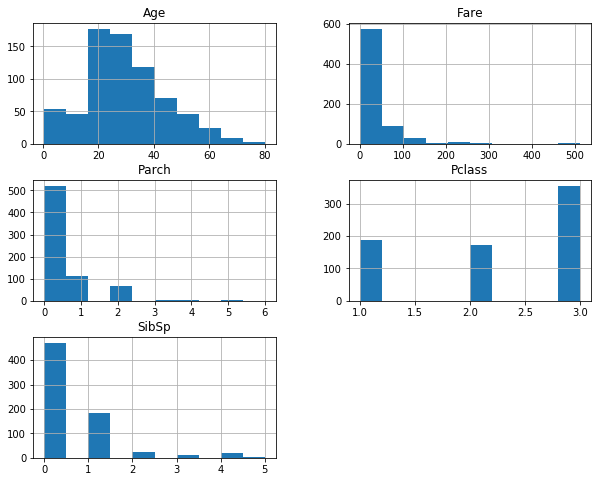

In [7]:
%matplotlib inline
_ = train_data_Titanic.dropna().hist(figsize = (10,8))

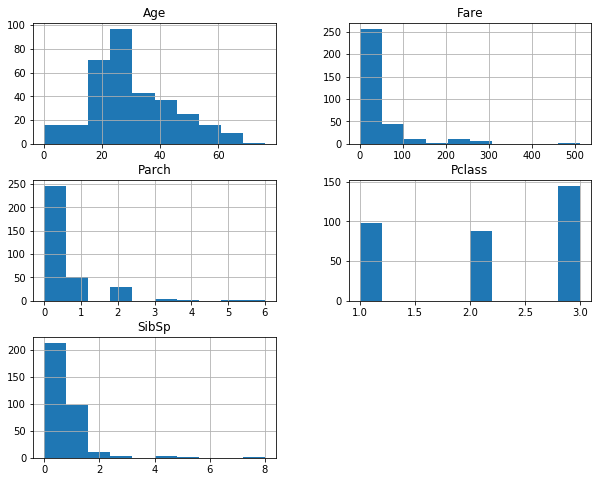

In [8]:
%matplotlib inline
_ = test_data_Titanic.dropna().hist(figsize = (10,8))

In [9]:
# Take out the nan data of age to use
train_drop_copy = train_data_Titanic.dropna(subset=["Age"])["Age"]
test_drop_copy = test_data_Titanic.dropna(subset=["Age"])["Age"]

In [10]:
def fill_age_norm(dataframe, dropped_empty_age):
    emtpy_index = dataframe["Age"].isnull()
    age_values = dataframe["Age"].values
    age_values[emtpy_index] = np.random.normal(np.mean(dropped_empty_age), np.std(dropped_empty_age), sum(emtpy_index))
    return dataframe

In [11]:
# For training data
# Fill all NA age with random normal dist of existing age data
#train_data_Titanic.fillna({'Age': np.random.normal(np.mean(train_drop_copy["Age"]))}, inplace = True)
fill_age_norm(train_data_Titanic, train_drop_copy)

# For testing data
# Fill all NA age with random normal dist of existing age data
# Fill the NA fare with median fare
fill_age_norm(test_data_Titanic, test_drop_copy)
test_data_Titanic.fillna({'Fare': test_data_Titanic['Fare'].median()}, inplace = True)

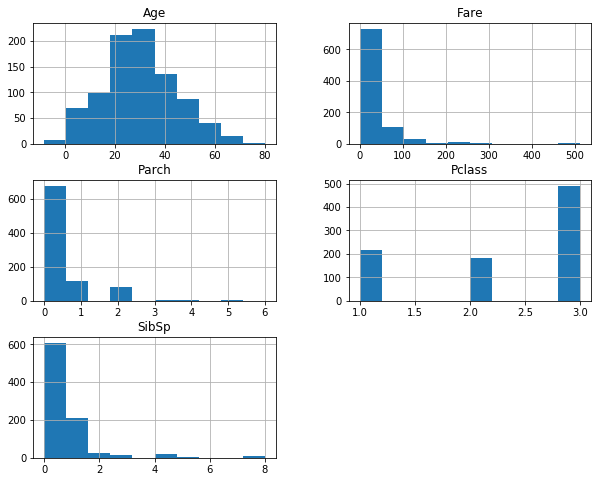

In [12]:
# Look at the distribution of the data
_ = train_data_Titanic.dropna().hist(figsize = (10,8))

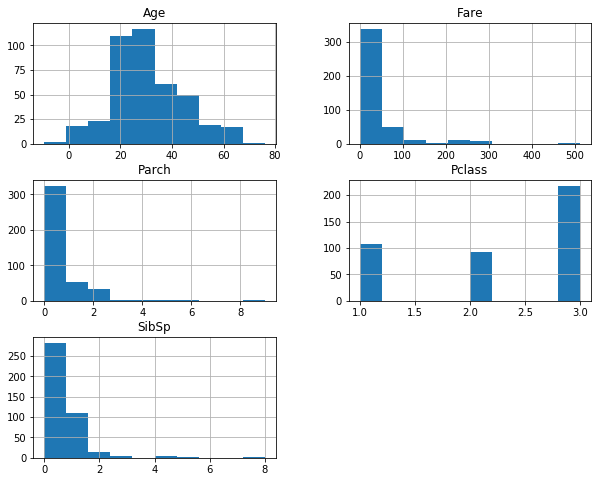

In [13]:
%matplotlib inline
_ = test_data_Titanic.dropna().hist(figsize = (10,8))

In [14]:
# Importing Logistic regression model form sklearn
from sklearn.linear_model import LogisticRegression
# Using sumple imputer to fill in na values
from sklearn.preprocessing import StandardScaler
# Use one hot encoder to convert categorical data into vectors
from sklearn.preprocessing import OneHotEncoder
# Use pipeline to clean data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Using gridsearch to search for best hyperparameters
from sklearn.model_selection import GridSearchCV

In [15]:
titanic_num = train_data_Titanic.drop(["Sex"], axis=1)
numerical_features = list(titanic_num)
categorical_features = ["Sex"]

In [16]:
# Writing pipeline to deal with the numerical data, standardizing
num_pipe = Pipeline([
        ('standarizer', StandardScaler()),
    ])

# Writing pipeline to deal with the categorical data, onehotvector
cat_pipe = Pipeline([
    ('one_encoder', OneHotEncoder(sparse=False))
])

# Combine the two pipelines to run together
combined_pipe = ColumnTransformer([
    ("numerical", num_pipe, numerical_features),
    ("catergorical", cat_pipe, categorical_features)
])

# Use the pipeline
train_vec = combined_pipe.fit_transform(train_data_Titanic)

In [20]:
train_vec[0]

array([ 0.82737724, -0.51629438,  0.43279337, -0.47367361, -0.50244517,
        0.        ,  1.        ])

In [17]:
# Use grid search to find best C and penalty method
grid_param = [
    {'C': np.linspace(0.01, 0.05,20),
    'penalty': ['l1', 'l2'],},
]

lg = LogisticRegression()

grid_search = GridSearchCV(lg, grid_param, cv = 10,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(train_vec, train_label)

/Users/hangyulin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': array([0.01   , 0.01211, 0.01421, 0.01632, 0.01842, 0.02053, 0.02263,
       0.02474, 0.02684, 0.02895, 0.03105, 0.03316, 0.03526, 0.03737,
       0.03947, 0.04158, 0.04368, 0.04579, 0.04789, 0.05   ]), 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [18]:
# The best C and penalty method
grid_search.best_params_

{'C': 0.01842105263157895, 'penalty': 'l2'}

In [19]:
# Use the pipeline
y_pred = grid_search.best_estimator_.predict(train_vec)

In [20]:
print("The average prediction accuracy of cross validation is", round(sum(y_pred == train_label)/len(y_pred), 4))

The average prediction accuracy of cross validation is 0.7957


## (c)

In [21]:
#Using pipeline to clean the testing data 
test_vec = combined_pipe.fit_transform(test_data_Titanic)

In [22]:
#Test the data using the training model
test_pred = grid_search.best_estimator_.predict(test_vec)

In [23]:
#convert the result to csv form 
test_result = pd.DataFrame({"PassengerId": test_data_PassengerId, "Survived": test_pred})
test_result.to_csv("Submission.csv", index = False)